In [14]:
#importing all necessary packages. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
#read the dataset vale from the csv file.
df = pd.read_csv('Week_2.csv',header = None,skiprows =1)
df.columns=['X1','X2','Y']
print(df.head())

     X1    X2  Y
0 -0.47  0.83 -1
1 -0.76 -0.52  1
2 -0.45 -0.61  1
3  0.80 -0.26  1
4 -0.41 -0.58  1


In [15]:
#append the dataset values as said in question.
df['X3'] = df['X1']*df['X1']
df['X4'] = df['X2']*df['X2']
#print the otput for verification
print(df)

       X1    X2  Y      X3      X4
0   -0.47  0.83 -1  0.2209  0.6889
1   -0.76 -0.52  1  0.5776  0.2704
2   -0.45 -0.61  1  0.2025  0.3721
3    0.80 -0.26  1  0.6400  0.0676
4   -0.41 -0.58  1  0.1681  0.3364
..    ...   ... ..     ...     ...
994  0.21 -0.21  1  0.0441  0.0441
995  0.66 -0.11  1  0.4356  0.0121
996 -0.39  0.38 -1  0.1521  0.1444
997 -0.49  0.79 -1  0.2401  0.6241
998  0.47 -0.83  1  0.2209  0.6889

[999 rows x 5 columns]


In [16]:
#Assigning dataset values.
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X3=df.iloc[:,3]
X4=df.iloc[:,4]
Z=np.column_stack((X3,X4))
X=np.column_stack((X2,X3))
y=df.iloc[:,2]

In [17]:
#base model training and calculating the output.[it always prdict one class ie.1]
#trainning and testing the entire dataset would be useful for increasing accuracy.
X_train = Z
y_train = y
#assigning object value.
model1 = LogisticRegression(penalty='none',solver='lbfgs')
model1.fit(X_train, y_train)
#print the parameter value.
print(model1.intercept_, model1.coef_)
#y_pred_val=(0.24436103*X1 + (-3.73200988 * X2) + 2.11498181)
#y_pred1 = np.sign(0.24436103*X1 + (-3.73200988 * X2) + 2.11498181)
y_pred_base=model1.predict(X_train)
df['y_predicted_base']=y_pred_base
#calculating accuracy.
print(accuracy_score(y_train, y_pred_base, normalize=False))
print(model1.score(X_train,y_train))
print(df.head())

[0.39912625] [[ 6.46476481 -1.81795725]]
742
0.7427427427427428
     X1    X2  Y      X3      X4  y_predicted_base
0 -0.47  0.83 -1  0.2209  0.6889                 1
1 -0.76 -0.52  1  0.5776  0.2704                 1
2 -0.45 -0.61  1  0.2025  0.3721                 1
3  0.80 -0.26  1  0.6400  0.0676                 1
4 -0.41 -0.58  1  0.1681  0.3364                 1


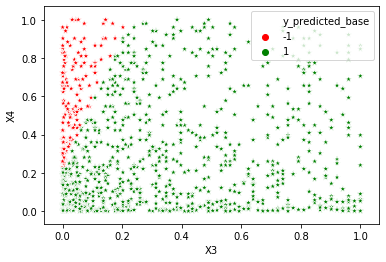

In [18]:
#ploting the baseline model.
sbn.scatterplot(x='X3',y='X4', hue='y_predicted_base',palette=['r','g'],marker='*',s=50, data=df)
plt.show()

[0.08881696] [[-26.29119287  52.11226428]]
980
0.980980980980981


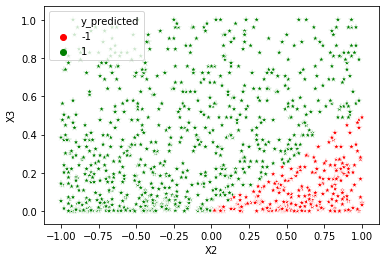

     X1    X2  Y      X3      X4  y_predicted_base  y_predicted
0 -0.47  0.83 -1  0.2209  0.6889                 1           -1
1 -0.76 -0.52  1  0.5776  0.2704                 1            1
2 -0.45 -0.61  1  0.2025  0.3721                 1            1
3  0.80 -0.26  1  0.6400  0.0676                 1            1
4 -0.41 -0.58  1  0.1681  0.3364                 1            1


In [19]:
#Train the model and predict the output[best pair was choosen for better accuracy]
Xtrain = X
ytrain = y
model = LogisticRegression(penalty='none',solver='lbfgs')
model.fit(Xtrain, ytrain)
#print the parameter value
print(model.intercept_, model.coef_)
#y_pred_val=(0.24436103*X1 + (-3.73200988 * X2) + 2.11498181)
#y_pred1 = np.sign(0.24436103*X1 + (-3.73200988 * X2) + 2.11498181)
y_pred=model.predict(Xtrain)
df['y_predicted']=y_pred
print(accuracy_score(y, y_pred, normalize=False))
print(model.score(Xtrain,ytrain))
#plotting the graph for optimal input/independent features.
sbn.scatterplot(x='X2',y='X3', hue='y_predicted',palette=['r','g'],marker='*',s=50, data=df)
plt.show()
print(df.head())


In [20]:
#this is used to compare the accuracy of trained model.
Cost = np.empty(shape=[0, 1])
Cost=y-y_pred
df['Cost']=Cost
x=df.loc[df['Cost'] != 0].shape
print (x)
print(df.head())



(19, 8)
     X1    X2  Y      X3      X4  y_predicted_base  y_predicted  Cost
0 -0.47  0.83 -1  0.2209  0.6889                 1           -1     0
1 -0.76 -0.52  1  0.5776  0.2704                 1            1     0
2 -0.45 -0.61  1  0.2025  0.3721                 1            1     0
3  0.80 -0.26  1  0.6400  0.0676                 1            1     0
4 -0.41 -0.58  1  0.1681  0.3364                 1            1     0


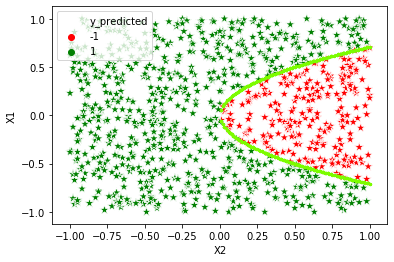

In [21]:
#calculating the decision boundary which implies y=0.
#decision boundary here is parabolic. obtained by equating mx1+mx2+c= 0. 'm' is slope and c is intercept.
X1_square=(((-26.29119287*X2)+0.08881696)/-(52.11226428))**(1/2.0)
X1_minus=-X1_square
#x_t = list(X1_minus).append((X1_square))
#x3_new=math.sqrt(X1_square)
#plotting the obtained value for quadratic equation.
sbn.scatterplot(x='X2',y='X1', hue='y_predicted',palette=['r','g'],marker='*',s=100, data=df)
plt.scatter(X2,X1_square, linestyle='-',color='lawngreen',s=5)
plt.scatter(X2,X1_minus, linestyle='-',color='lawngreen',s=5)
plt.show()

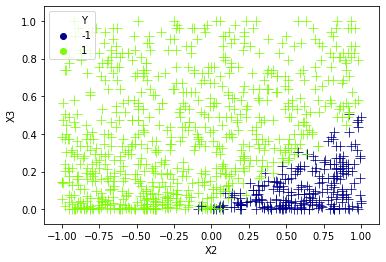

In [22]:
sbn.scatterplot(x='X2',y='X3', hue='Y', s=100, palette =['darkblue','lawngreen'], marker='+', data=df)
plt.show()


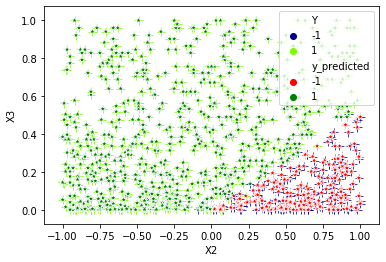

In [23]:
sbn.scatterplot(x='X2',y='X3', hue='Y', s=75, palette =['darkblue','lawngreen'], marker='+', data=df)
sbn.scatterplot(x='X2',y='X3', hue='y_predicted',palette=['r','g'],marker='*',s=50, data=df)
plt.show()

In [28]:
#export the findings into a csv file
pd.DataFrame(df).to_csv('Week2_LR_4_features.csv',index=False)